In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

--- First 5 Rows of the Dataset ---
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13940\3261297763.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


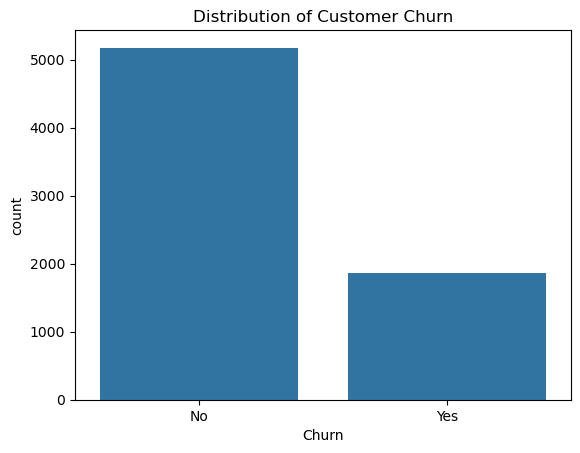

In [8]:
# Load the dataset from the provided CSV file
df = pd.read_csv('customerChurn.csv')

print("--- First 5 Rows of the Dataset ---")
print(df.head())
print("\n--- Dataset Information ---")
df.info()

# Convert to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Fill NaN values with the median of the column
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

print("\n--- Missing Values Check after Handling ---")
print(df.isnull().sum())

# Explore the balance of the target variable 'Churn'
print("\n--- Churn Distribution ---")
print(df['Churn'].value_counts())
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.show()

In [9]:
# Convert the target variable 'Churn' to binary (1 for Yes, 0 for No) 
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Define features (X) and target (y)
X = df.drop(['customerID', 'Churn'], axis=1) # Drop customerID as it's an identifier
y = df['Churn']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns





In [10]:
# --- Create Preprocessing Pipelines ---

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (5634, 19)
Test set shape: (1409, 19)


In [12]:
# Create the logistic regression model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(random_state=42))])




In [13]:
# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [14]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred) 
conf_matrix = confusion_matrix(y_test, y_pred) 

# Print evaluation metrics
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8211
Precision: 0.6850
Recall: 0.6005
F1 Score: 0.6400


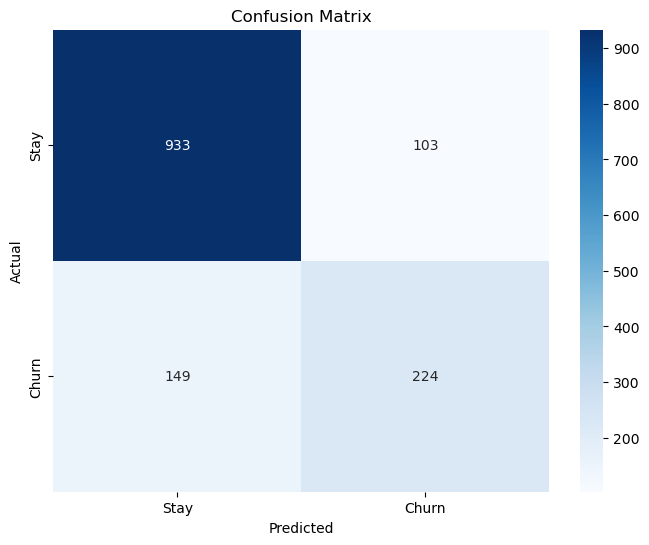

In [15]:
# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay', 'Churn'], yticklabels=['Stay', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Save the model using pickle to a file named 'logistic_model.pkl'
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("\nModel has been successfully saved as 'logistic_model.pkl'")


Model has been successfully saved as 'logistic_model.pkl'
